# Part II - Europe Union Happiness Report (2011-2018)
## by (Zainab Shafeeq)

## Investigation Overview


> This investigation aims to explore the factors associated with happiness within European Union (EU) countries between 2011 and 2018. Using the World Happiness Report data, we sought to understand how economic prosperity, social support, perceptions of corruption, and other factors relate to self-reported happiness levels, as measured by the Life Ladder score. Our analysis followed a structured approach, progressing from univariate exploration of individual variable distributions to bivariate and multivariate analyses to uncover relationships and interactions between these factors. 


## Dataset Overview and Executive Summary

> This analysis utilizes data from the World Happiness Report. The dataset includes information on `Life Ladder` scores (a measure of overall happiness), `Log GDP per capita` (a measure of economic output), `social support`, `healthy life expectancy`, `freedom to make life choices`, `generosity`, `perceptions of corruption`, and `positive` and `negative affect`. We focused our analysis on EU countries between 2011 and 2018.

Our exploratory analysis revealed several key findings:

* **Happiness Distribution**: The distribution of happiness scores suggests the potential presence of two distinct groups of countries within the EU with differing average happiness levels.

* **Economic Prosperity and Happiness**: There is a clear *positive* relationship between a country's economic output (`Log GDP per capita`) and the average happiness of its citizens (`Life Ladder`). However, this relationship is **not** perfectly linear.

* **Perceived Corruption and Happiness**: Higher levels of `perceived corruption` are associated with lower average happiness levels (a negative relationship).

* **Combined Influence of Economic Prosperity and Corruption**: Our analysis suggests that the positive impact of economic prosperity on happiness is less pronounced in countries where corruption is perceived to be high.

* **Temporal Trends in Happiness**: There is evidence of a slight increase in happiness scores over the years studied (2011-2018), even among countries with similar levels of economic output. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the cleaned dataset into a pandas dataframe
eu_happiness = pd.read_csv('Europe_union_happiness_report_2011_2018_cleaned.csv')

In [12]:
#Creating the bins and labels
bins = np.arange(0, 1.1, 0.1)
labels = [f'{i:.1f}-{i+0.1:.1f}' for i in np.arange(0, 1, 0.1)]

In [10]:
#Creating a copy of the dataset
eu_happiness_copy = eu_happiness.copy()

In [13]:
#Creating a new column by binning the values from the 'Perceptions of corruption' column
eu_happiness_copy['Corruption Category'] = pd.cut(eu_happiness_copy['Perceptions of corruption'], bins=bins, labels=labels, right=False)

In [4]:
def plotting(x_label, y_label, title, legend=False, grid=False):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    if legend:
        plt.legend()
    plt.grid(grid)
    plt.show()

## Distribution of Life Ladder

> This histogram reveals the distribution of happiness scores across the EU, highlighting a potential bimodality.

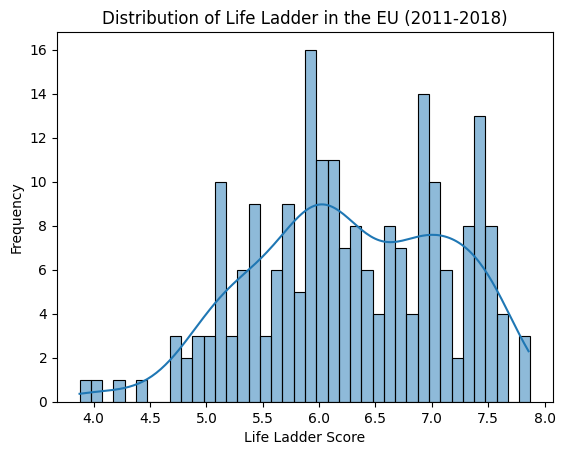

In [5]:
#Creating bins with step-size of 0.10
bins = np.arange(eu_happiness['Life Ladder'].min(), eu_happiness['Life Ladder'].max() + 0.10, 0.10)
sns.histplot(eu_happiness['Life Ladder'], bins=bins, kde=True, edgecolor='black')

#Re-plotting the histogram
plotting('Life Ladder Score', 'Frequency', 'Distribution of Life Ladder in the EU (2011-2018)')

## Relationship Between Happiness  and Economic Prosperity

> This scatter plot demonstrates a clear positive relationship between economic prosperity (`Log GDP per capita`) and happiness (`Life Ladder`), indicating that wealthier countries tend to have happier citizens.

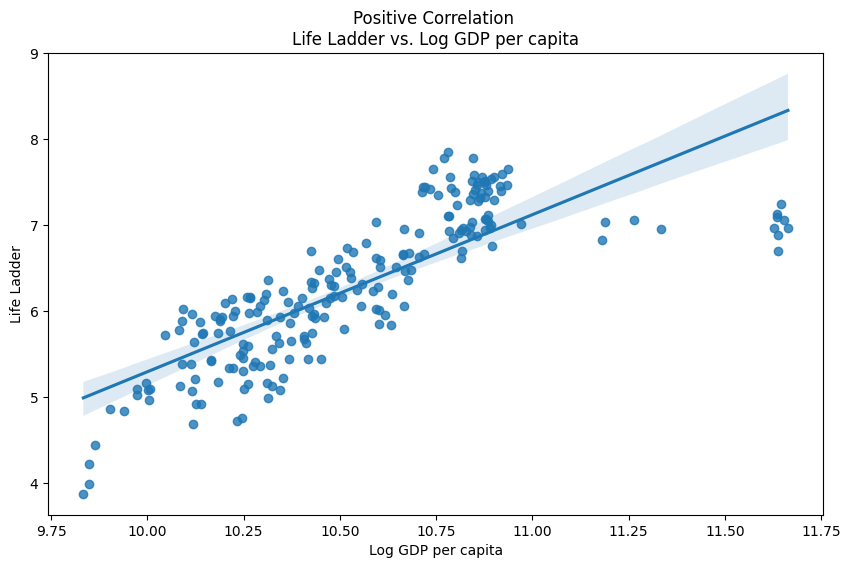

In [9]:
plt.figure(figsize=(10, 6))

sns.regplot(x='Log GDP per capita', y='Life Ladder', data=eu_happiness)

plotting('Log GDP per capita', 'Life Ladder', 'Positive Correlation \nLife Ladder vs. Log GDP per capita')

## Impact of Perceived Corruption on Average Happiness

> This bar chart shows a strong negative association between perceived corruption and happiness. As perceived corruption increases, average happiness scores consistently *decline*.

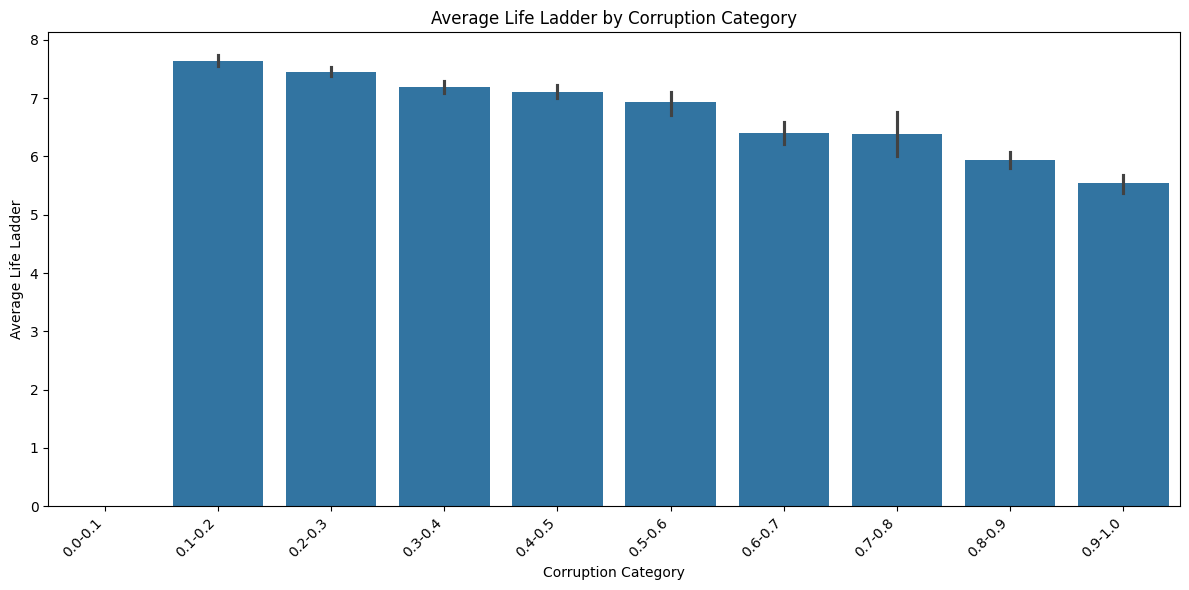

In [14]:
#Plotting a Clustered Bar Chart of Average Life Ladder vs. Corruption Category
plt.figure(figsize=(12, 6))
sns.barplot(x='Corruption Category', y='Life Ladder', data=eu_happiness_copy, order=labels)

plt.title('Average Life Ladder by Corruption Category')
plt.xlabel('Corruption Category')
plt.ylabel('Average Life Ladder')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Temporal Trends in the Relationship Between Happiness and Economic Prosperity

> This scatterplot shows how the relationship between GDP and happiness has evolved over time. There's a subtle upward shift in happiness scores over the years, suggesting potential improvements in well-being *beyond* what can be explained by GDP growth alone.

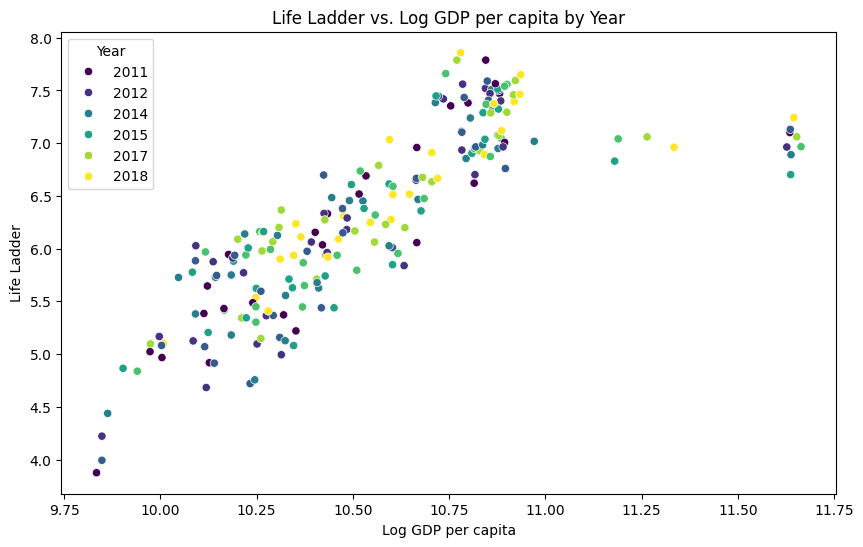

In [16]:
#Plotting a Scatterplot of Life Ladder vs. Log GDP per capita by Year
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='Life Ladder', hue='year', data=eu_happiness, palette='viridis')

plt.title('Life Ladder vs. Log GDP per capita by Year')
plt.xlabel('Log GDP per capita')
plt.ylabel('Life Ladder')
plt.legend(title='Year')
plt.show()

## Influence of Perceived Corruption on the Relationship Between Economic Prosperity and Happiness

> This facet grid reveals that the positive relationship between economic prosperity and happiness may be moderated by perceived corruption.

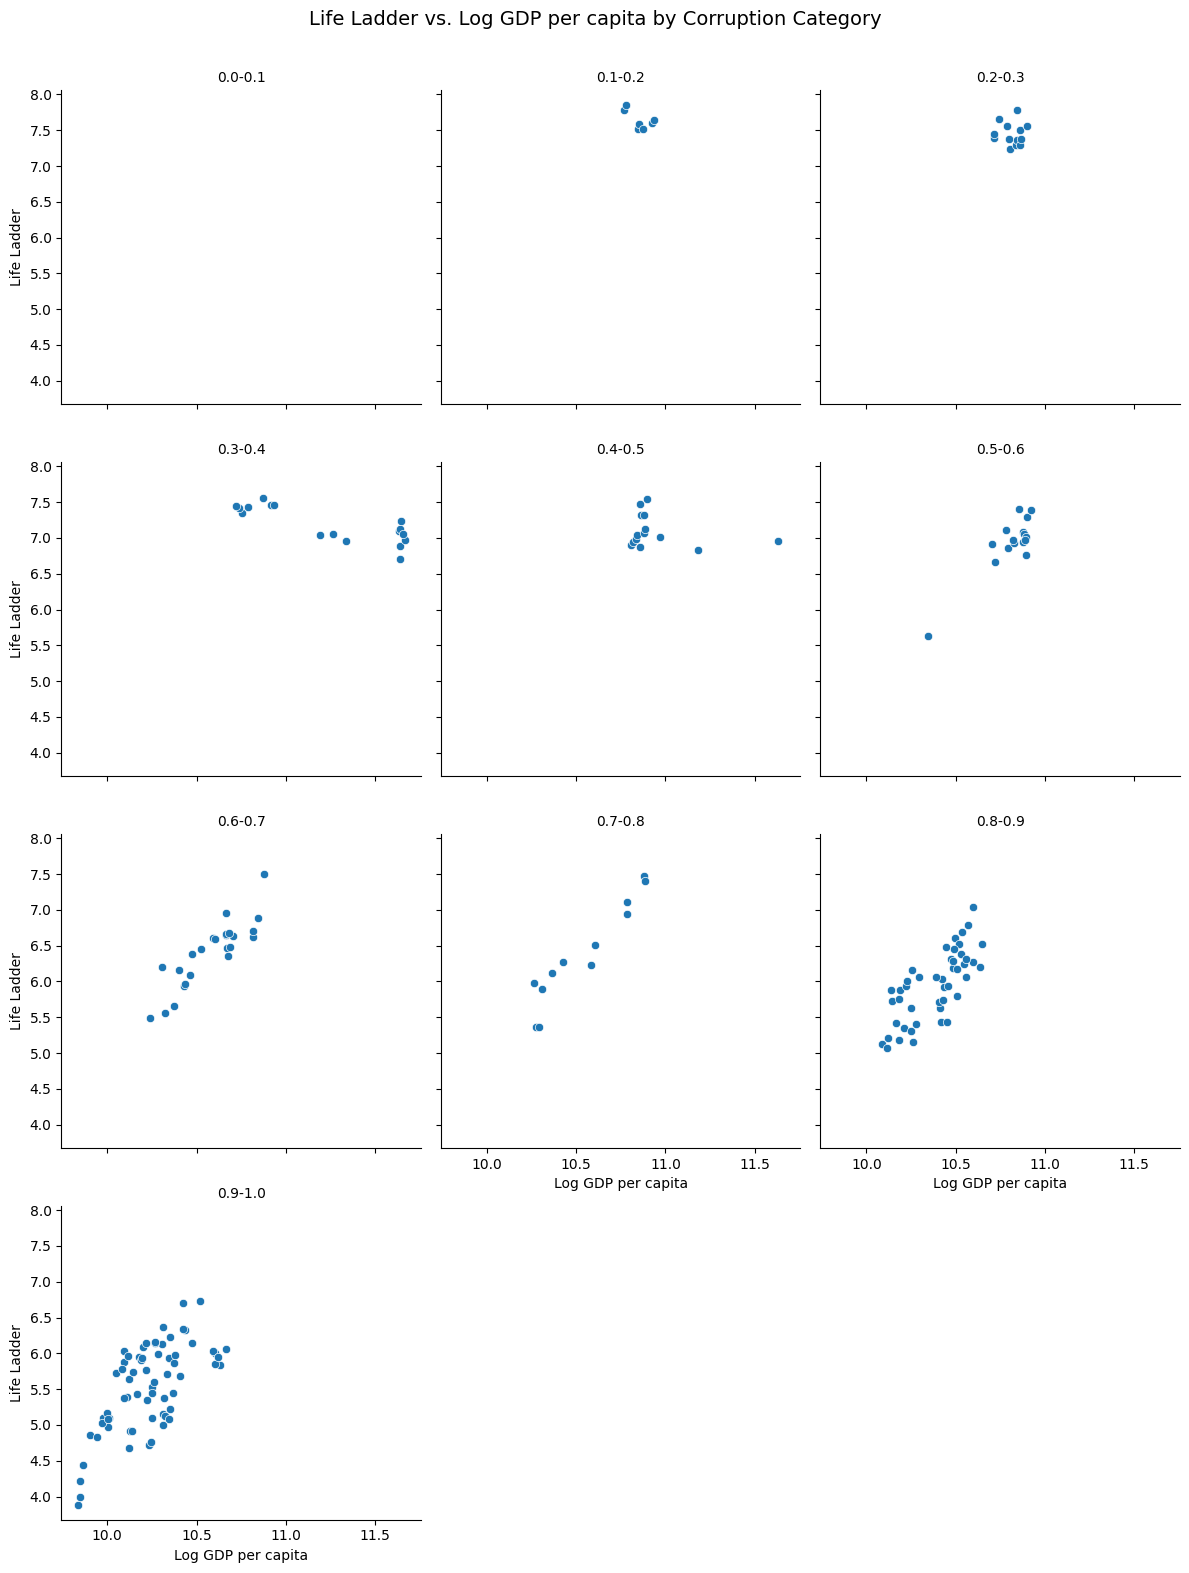

In [15]:
#Plotting a FacetGrid of Life Ladder vs. Log GDP per capita by Corruption Category
g = sns.FacetGrid(eu_happiness_copy, col='Corruption Category', col_wrap=3, height=4, aspect=1)
g.map(sns.scatterplot, 'Log GDP per capita', 'Life Ladder')
g.set_axis_labels("Log GDP per capita", "Life Ladder")
g.set_titles(col_template="{col_name}")
g.fig.suptitle('Life Ladder vs. Log GDP per capita by Corruption Category\n\n', fontsize=14)

plt.tight_layout()
plt.show()